# X.2: FILTER - HOW MUCH WILL THEY SHOP?

### Import libraries 

In [5]:
# %matplotlib notebook
%matplotlib inline
#Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import dataframe_image as dfi
from datetime import time
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
from matplotlib.pyplot import figure



from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

# importing the required function
from scipy.stats import chi2_contingency

### Load and view data 

In [6]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH3\df\df_HH3.csv")

# del df["HH"]
df.describe(include='all')

,week,order_ID,item_name,amount,price_unit,price_total,item_type,category,day,time,...,storename_num,cat_num,time_num,promo_num,datetime,timestamp,dates,times,times_min,dates_days
count,266.000000,266.000000,266,266.000000,266.000000,266.000000,266,266,266,266,...,266.000000,266.000000,266.000000,266.000000,266,2.660000e+02,266,266,266.000000,2.660000e+02
unique,NaN,NaN,219,NaN,NaN,NaN,103,15,6,3,...,NaN,NaN,NaN,NaN,18,NaN,16,18,NaN,NaN
top,NaN,NaN,BONI brood keizer 6x50g,NaN,NaN,NaN,sandwiches,bakery,Wednesday,evening,...,NaN,NaN,NaN,NaN,2021-11-23 18:41:00,NaN,2021-11-23,18:41:00,NaN,NaN
freq,NaN,NaN,5,NaN,NaN,NaN,17,42,91,168,...,NaN,NaN,NaN,NaN,39,NaN,39,39,NaN,NaN
mean,4.706767,9.112782,NaN,1.338346,2.285553,2.645734,NaN,NaN,NaN,NaN,...,2.266917,7.657895,0.800752,0.018797,NaN,1.641034e+18,NaN,NaN,1744.428571,2.021637e+07
std,2.551454,5.116240,NaN,1.218643,2.672999,2.927494,NaN,NaN,NaN,NaN,...,1.713486,4.764598,0.690747,0.136063,NaN,2.401568e+15,NaN,NaN,165.970686,4.437701e+03
min,1.000000,1.000000,NaN,1.000000,0.193120,0.193120,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.637693e+18,NaN,NaN,1146.000000,2.021112e+07
25%,2.000000,4.000000,NaN,1.000000,0.990000,1.190000,NaN,NaN,NaN,NaN,...,1.000000,4.000000,0.000000,0.000000,NaN,1.638385e+18,NaN,NaN,1658.000000,2.021120e+07
50%,5.000000,10.000000,NaN,1.000000,1.655000,1.890000,NaN,NaN,NaN,NaN,...,2.000000,9.000000,1.000000,0.000000,NaN,1.641840e+18,NaN,NaN,1810.000000,2.022011e+07
75%,7.000000,12.000000,NaN,1.000000,2.592940,2.990000,NaN,NaN,NaN,NaN,...,2.000000,11.000000,1.000000,0.000000,NaN,1.643216e+18,NaN,NaN,1841.000000,2.022013e+07


In [7]:
# use the corr function to display the correlation between all the features
data_corr = df.corr()
# data_corr

In [8]:
# df_count = df[['order_ID','store_name', 'day']]
# df_count = df_count.drop_duplicates()
# df_count = df_count.drop(columns=['order_ID'])
# df_count.head()

In [9]:
df_orders = df[['week','order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'times', 'dates', 'times_min', 'dates_days', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

In [10]:
#Let's try afternoon and evening as one group
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')

# GENERAL CORRELATIONS

## 1.1 AMOUNT vs DAY (all orders)

In [17]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('day')['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.06710202965416219


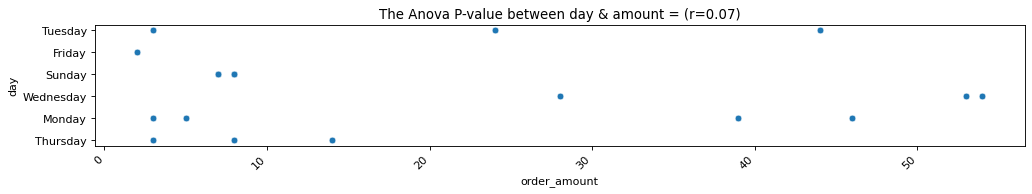

In [18]:
figure(figsize=(17, 2), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='day')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between day & amount = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

## 1.2 AMOUNT vs TIME (all orders)

In [19]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('time')['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.06641048468644299


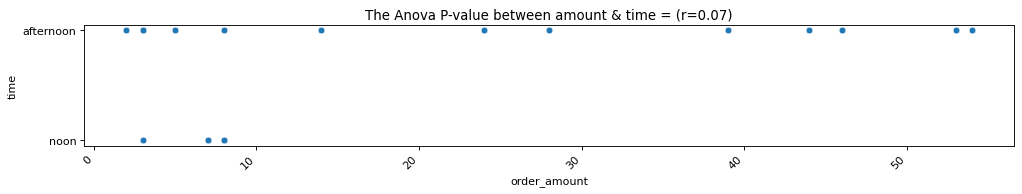

In [20]:
figure(figsize=(15, 2), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='time')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & time = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

## 1.3 AMOUNT vs STORE (all orders)

### Store NAME

In [23]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('store_name')['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.05361786313705605


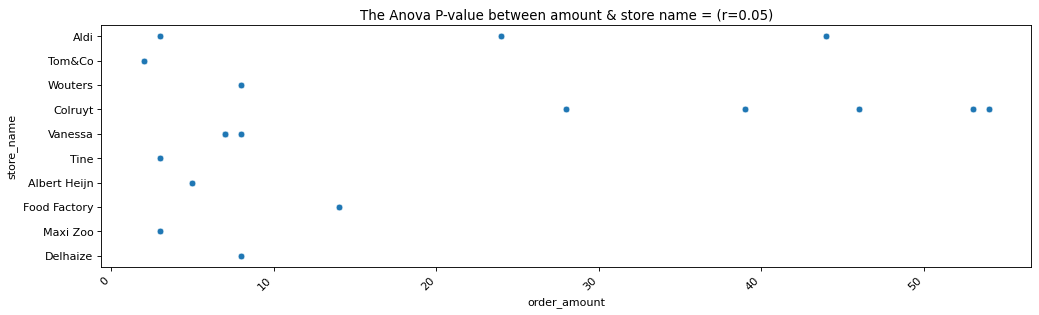

In [24]:
figure(figsize=(15, 4), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='store_name')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & store name = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

### Store TYPE

In [21]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('store_type')['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0255199585699541


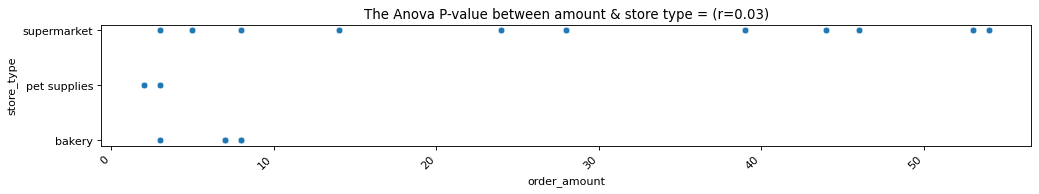

In [22]:
figure(figsize=(15, 2), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='store_type')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & store type = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

In [22]:
# to select only supermarkets
storet1 = 'supermarket'

# select only these data for the df
df_storet1 = df_orders[df_orders['store_type'] == storet1]

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_storet1.groupby('store_name')['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.12421712633874211


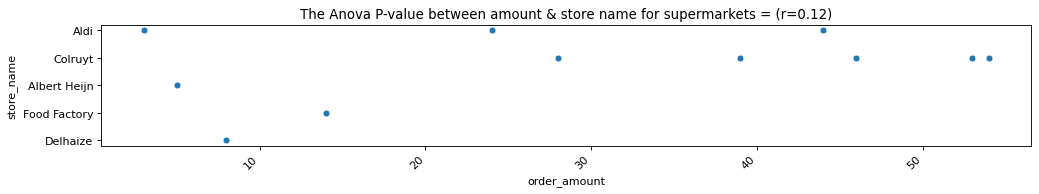

In [21]:
# scatter plot for the Anova results
figure(figsize=(15, 2), dpi=80)
plt.xticks(rotation=45, ha='right')
sns.scatterplot(data=df_storet1, x='order_amount', y='store_name')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & store name for supermarkets = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

## 1.4 AMOUNT vs WEEK (all orders)

In [11]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('week')['order_amount'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.6505619593888955


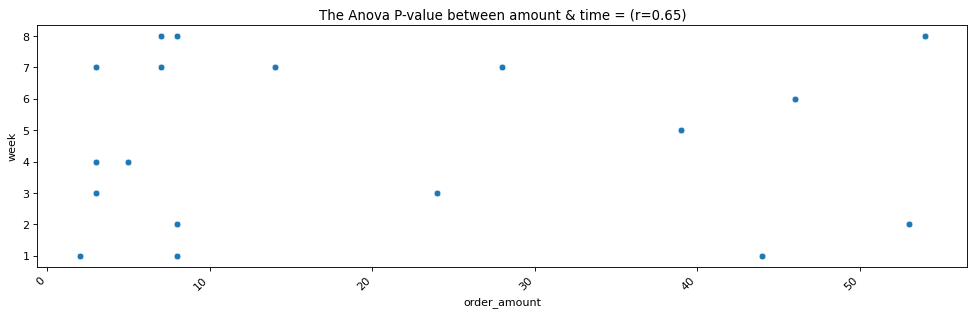

In [15]:
figure(figsize=(15, 4), dpi=80)
plt.xticks(rotation=45, ha='right')

sns.scatterplot(data=df_orders, x='order_amount', y='week')

# get the Pearson correlation between both variables
current_corr = round(AnovaResults[1], 2)

# give the graph a title and labels
plt.title(f"The Anova P-value between amount & time = (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

Not significant, amount thus presumably fluctuates around the same number each week